In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

#!ls

In [4]:
def f(temperature, eMean, tList): #returns energy
    return eMean[np.argmin(np.abs(tList - temperature))]

    
def f_inv(energy, eMean, tList): #returns temperature
    return tList[np.argmin(np.abs(eMean - energy))]


def add_T(Tmin, Tmax):
    plt.axvline(Tmin, linewidth=3, linestyle="--", color='red')
    plt.axvline(Tmax, linewidth=3, linestyle="--", color='green')
    E_min = e_mean[np.argmin(np.abs(temp - Tmin))]
    E_max = e_mean[np.argmin(np.abs(temp - Tmax))]
    print('E_max =', round(E_max,2), 'keV')
    print('E_min =', round(E_min,2), 'keV')
    plt.axhline(E_min, linewidth=3, linestyle="--", color='red', label='$E_{min}$')
    plt.axhline(E_max, linewidth=3, linestyle="--", color='green', label='$E_{max}$')    
    plt.legend(fontsize=15, loc = 4)
    
    
def get_data(dataName, show_table=False):

    headers = [ 'Flux', 'Abund', 'T', 'z', 'n_H', 'Chnls', '$E_{min}$', '$E_{max}$', '$E_{sum}$', 'cs', 'ecs' ] 
    table = pd.read_csv(dataName, sep = ' ', names = headers)
    table['$E_{mean}$'] = table['ecs']/table['cs'] #adding column with E_mean
    if show_table:
        display(table)
    return table.to_numpy().astype(float)
    

def plot_E_T(dataName, spt, tel):

    #print(dataName)
    headers = [ 'Flux', 'Abund', 'T', 'z', 'n_H', 'Chnls', '$E_{min}$', '$E_{max}$', '$E_{sum}$', 'cs', 'ecs' ] 
    
    table = pd.read_csv(dataName, sep = ' ', names = headers)
    table['$E_{mean}$'] = table['ecs']/table['cs'] #adding column with E_mean

    data = table.to_numpy().astype(float)
    e_mean = data[:,11]
    temp = data[:,2]
    
    abundance = table['Abund'].to_numpy().astype(float)[0]
    absorption = table['n_H'].to_numpy().astype(float)[0]
    redshift = table['z'].to_numpy().astype(float)[0]
    
    #spt = 0 # 0 - lines,   1 - continuum
    #tel = 0 # 0 - chandra, 1 - erosita
    spectra_type = ['Lines' if spt==0 else 'Continuum']
    telescope = ['Chandra' if tel==0 else 'eROSITA']
    
    plt.plot(temp, e_mean, linewidth=3, label=spectra_type[0]+', '+telescope[0])#Label)
    
    plt.xlabel('Temperature (keV)', fontsize = 15)
    plt.ylabel('Average energy (keV)', fontsize = 15)
    plt.title(spectra_type[0]+'-dominated spectra ('+telescope[0][:4]+') \n $n_H ='+str(absorption)+'\cdot 10^{22} \ cm^{-2}$; z = '+str(redshift), fontsize = 15) # +'; Z = '+str(abundance)+' Solar units')
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xscale('log')
    #plt.yscale('log')
    #plt.grid()
    plt.legend(fontsize = 15)

    #return data[:,11], data[:,2]
    #return e_mean, temp

,Flux,Abund,T,z,n_H,Chnls,$E_{min}$,$E_{max}$,$E_{sum}$,cs,ecs,$E_{mean}$
0,2.397387e-10,0.0,0.100000,0.0,0.01,533,0.2117,7.9789,2182.794951,496.068570,281.841577,0.568150
1,2.626724e-10,0.0,0.102329,0.0,0.01,533,0.2117,7.9789,2182.794951,549.231272,314.129501,0.571944
2,2.883814e-10,0.0,0.104713,0.0,0.01,533,0.2117,7.9789,2182.794951,612.054435,353.209067,0.577088
3,3.147778e-10,0.0,0.107152,0.0,0.01,533,0.2117,7.9789,2182.794951,676.673320,393.437514,0.581429
4,3.427628e-10,0.0,0.109648,0.0,0.01,533,0.2117,7.9789,2182.794951,747.312996,437.965302,0.586053
...,...,...,...,...,...,...,...,...,...,...,...,...
196,8.210862e-11,0.0,9.120108,0.0,0.01,533,0.2117,7.9789,2182.794951,1577.425738,3892.188190,2.467430
197,8.084501e-11,0.0,9.332543,0.0,0.01,533,0.2117,7.9789,2182.794951,1555.610144,3846.929243,2.472939
198,7.956546e-11,0.0,9.549926,0.0,0.01,533,0.2117,7.9789,2182.794951,1533.499695,3800.965378,2.478622
199,7.833990e-11,0.0,9.772372,0.0,0.01,533,0.2117,7.9789,2182.794951,1512.147184,3755.788931,2.483746


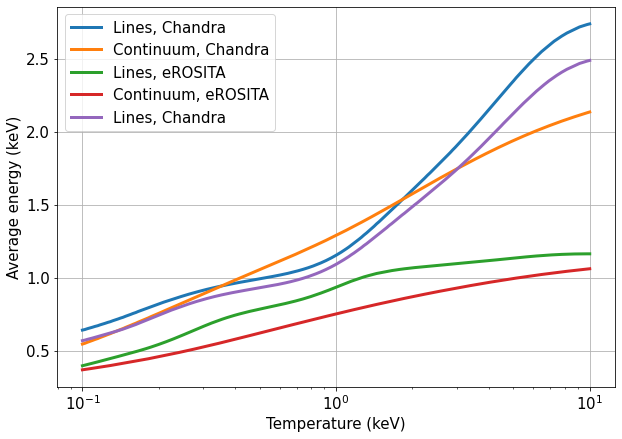

In [5]:
data_name1 = "data/stats_04.dat"   #'Lines, CH'
data_name2 = "data/stats_11.dat"   #'Cont, CH'
data_name3 = "data/stats_10.dat"   #'Lines, ER'
data_name4 = "data/stats_13.dat"   #'Cont, ER'
n28 = "stats_0.2-8.dat"

get_data(n28, show_table=True)

plt.figure(figsize=(10,7))

plot_E_T(data_name1, 0, 0)
plot_E_T(data_name2, 1, 0)
plot_E_T(data_name3, 0, 1)
plot_E_T(data_name4, 1, 1)
plot_E_T(n28, 0,0)
plt.title('')  #comment if there is only one E(T)

#add_T(T_min, T_max)

plt.grid()
plt.show()

# LINES

In [6]:
def get_Tspec(fmin, Tmin, Tmax, Data):
    
    Tspec = 0
    Etot = 0

    #smth = f_min[i]*f(T_min) + (1-f_min[i])*f(T_max)
    #eMean = Data[:,11]
    #tList = Data[:,2]
    #T_1 = Tmin
    #T_2 = Tmax

    E_1 = f(Tmin, Data[:,11], Data[:,2])
    E_2 = f(Tmax, Data[:,11], Data[:,2])

    #E_tot = f_min[i]*f(T_min) + (1-f_min[i])*f(T_max)

    S_j_1 = Data[np.argmin(np.abs(Data[:,2] - Tmin)), 9]
    S_j_2 = Data[np.argmin(np.abs(Data[:,2] - Tmax)), 9]
    
    #print(Data[np.argmin(np.abs(tList - Tmin)),9], Data[np.argmin(np.abs(tList - Tmax)),9])
    #print()

    #print(np.argmin(np.abs(data[:,11] - f_T)))

    num =    fmin*S_j_1*E_1 + (1-fmin)*S_j_2*E_2
    denum =  fmin*S_j_1     + (1-fmin)*S_j_2
    
    #Etot = num/denum
    #Tspec = f_inv(num/denum, Data[:,11], Data[:,2])
    #plt.scatter(fmin, Tspec, color="blue")

    return f_inv(num/denum, Data[:,11], Data[:,2])

In [7]:
from matplotlib.lines import Line2D

def plot_Tspec_fmin(Tmin, Tmax, Data):

#for k in range(0, len(Tmins)):

 #   T_min = Tmins[k]
 #   T_max = Tmaxs[k]

    f_min = np.linspace(0,1,21)

    plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')

    T_spec = f_min*0

    for i in range(0, len(f_min)):

        T_spec[i] = get_Tspec(f_min[i], T_min, T_max, Data)

    #print('*************')

    plt.plot(f_min, T_spec, linewidth=2, color='blue')#, label='eq. [1-3]')#'from '+str(T_max)+' to '+str(T_min))

    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel('$f_{min}$', fontsize = 15)
    plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    line_n = Line2D([], [], label='Naive weights', color='black', linestyle='--', linewidth=2)
    line_e = Line2D([], [], label='$T_{spec}$ from eq. [1-3]', color='blue', linestyle='-', linewidth=2)
    dots_f = Line2D([], [], label='Single-T fit', color='black', marker='.', linestyle='None', markersize=12)
    handles.extend([line_n, line_e, dots_f])
    plt.legend(handles=handles, fontsize=15)

,Flux,Abund,T,z,n_H,Chnls,$E_{min}$,$E_{max}$,$E_{sum}$,cs,ecs,$E_{mean}$
0,2.397387e-10,0.0,0.100000,0.0,0.01,533,0.2117,7.9789,2182.794951,496.068570,281.841577,0.568150
1,2.626724e-10,0.0,0.102329,0.0,0.01,533,0.2117,7.9789,2182.794951,549.231272,314.129501,0.571944
2,2.883814e-10,0.0,0.104713,0.0,0.01,533,0.2117,7.9789,2182.794951,612.054435,353.209067,0.577088
3,3.147778e-10,0.0,0.107152,0.0,0.01,533,0.2117,7.9789,2182.794951,676.673320,393.437514,0.581429
4,3.427628e-10,0.0,0.109648,0.0,0.01,533,0.2117,7.9789,2182.794951,747.312996,437.965302,0.586053
...,...,...,...,...,...,...,...,...,...,...,...,...
196,8.210862e-11,0.0,9.120108,0.0,0.01,533,0.2117,7.9789,2182.794951,1577.425738,3892.188190,2.467430
197,8.084501e-11,0.0,9.332543,0.0,0.01,533,0.2117,7.9789,2182.794951,1555.610144,3846.929243,2.472939
198,7.956546e-11,0.0,9.549926,0.0,0.01,533,0.2117,7.9789,2182.794951,1533.499695,3800.965378,2.478622
199,7.833990e-11,0.0,9.772372,0.0,0.01,533,0.2117,7.9789,2182.794951,1512.147184,3755.788931,2.483746


NameError: name 'fitlist2' is not defined

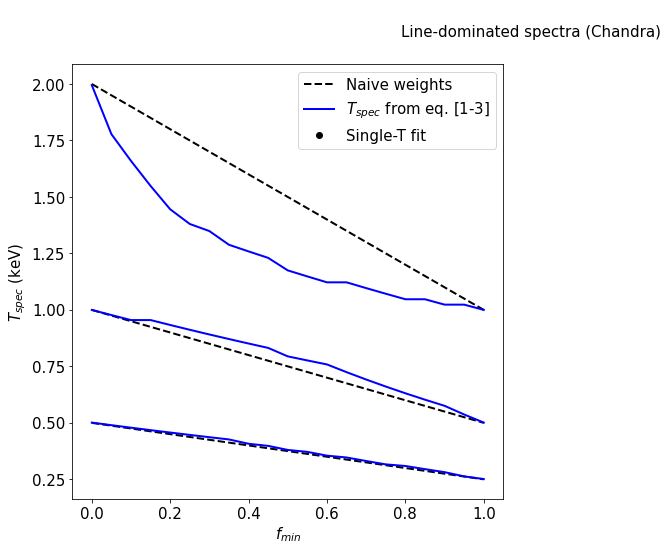

In [8]:
plt.figure(figsize=(17,8))

spt = 0 # 0 - lines,   1 - continuum
tel = 0 # 0 - chandra, 1 - erosita
spectra_type = ['Line' if spt==0 else 'Continuum']
telescope = ['Chandra' if tel==0 else 'eROSITA']

data = get_data(n28, show_table=True)

plt.suptitle('\n'+spectra_type[0]+'-dominated spectra ('+telescope[0]+')', fontsize = 15)

plt.subplot(1,2,1)

T_mins = (0.25, 0.5, 1.)
T_maxs = (0.5, 1.0, 2.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    plot_Tspec_fmin(T_min, T_max, data)
    
plt.scatter(np.linspace(0,1,21), fitlist2, color='black')
plt.scatter(np.linspace(0,1,21), fitlist3, color='black')
plt.scatter(np.linspace(0,1,21), fitlist4, color='black')
plt.scatter(np.linspace(0,1,21), fitlist5, color='grey')

#plt.legend(fontsize=15)
#plt.grid()
#plt.yscale('log')
plt.ylim(0, 2.3)

    
#print('_______________________________')
    
plt.subplot(1,2,2)

T_mins = (0.5, 1.0)
T_maxs = (1.5, 3.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    plot_Tspec_fmin(T_min, T_max, data)
    
plt.scatter(np.linspace(0,1,21), fitlist, color='black')
plt.scatter(np.linspace(0,1,21), fitlist1, color='grey')

#plt.savefig('fig3_'+telescope[0]+'.png')
plt.show()

In [9]:
fitlist5 = pd.read_csv("tspec_list.dat", header=None)[0].to_numpy().astype(float)
fitlist5

EmptyDataError: No columns to parse from file

# CONTINUUM

In [ ]:
plt.figure(figsize=(8,8))

f_min = np.linspace(0,1,21)
T_spec = f_min*0

T_mins = (0.25, 0.5, 1.0, 2.0)
T_maxs = (1.0,  2.0, 4.0, 8.0)

for k in range(0, len(T_mins)):
    
    T_min = T_mins[k]
    T_max = T_maxs[k]

    #plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')

    for i in range(0, len(f_min)):
        
        #smth = f_min[i]*f(T_min) + (1-f_min[i])*f(T_max)
        
        #T_1 = T_min
        #T_2 = T_max
            
        #E_1 = f_min[i]*f(T_1)
        #E_2 = (1-f_min[i])*f(T_2)
        
        E_tot = f_min[i]*f(T_min) + (1-f_min[i])*f(T_max)
        
        #S_j_1 = data[np.argmin(np.abs(data[:,11] - E_1)), 9]
        #S_j_2 = data[np.argmin(np.abs(data[:,11] - E_2)), 9]
        
        #print(np.argmin(np.abs(data[:,11] - f_T)))
        
        #num = S_j_1*E_1 + S_j_2*E_2
        #denum =  S_j_1+S_j_2
        #E_tot = num/denum
    
        T_spec[i] = f_inv(E_tot)

        #plt.scatter(f_min[i], T_spec, color="blue")
        
        #print(f_min[i],T_1, T_2)
        #print(E_1, E_2)
        #print(num, denum)
        #print(round(S_j_1), round(S_j_2))
        #print(E_tot, T_spec)
        #print(f_T, E_tot)
        #print('_')
     #print()
    
    plt.plot(f_min, T_spec, linewidth=2, color='blue')
#plt.grid()
plt.yscale('log')
plt.xticks(size=15)
plt.yticks([0.1, 1, 10], [0.1, 1, 10], size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
plt.title(spectra_type[0]+'-dominated spectra ('+telescope[0]+')', fontsize = 15)
#plt.savefig('fig3.1_'+telescope[0]+'.png')
plt.show()

# PyXspec

In [ ]:
for l in range(0,2):
    f_minnn = 0.0+0.05*(l-1)
    f_maxxx = 1-f_minnn
    mod = ('wabs*(const*(apec+const*apec)+const*(apec+const*apec))')
    mod.setPars(0.01, f_minnn, T_minnn, 1.0, 0, 1, 1., T_minnn, 0.0, 0, 1, f_maxxx, T_maxxx, 1.0, 0, 1, 1., T_maxxx, 0, 0, 1)
    mod.setPars(7: "-1, 0.0001, -1, -1, 1, 1")
    mod.setPars(17: "-1, 0.0001, -1, -1, 1, 1")
    mod.setPars(8=3)
    mod.setPars(18=13)
    mod.setPars(10=5)
    mod.setPars(20=15)
    sho pa
    @lines2fit.xcm
    fakeit nowrite none
    telescopes/chandra/djs50.ugc3957_v05.rmf
    telescopes/chandra/djs50.ugc3957_v05.arf
    y
    tttt
    tttt
    40000
    ignore **-0.1 10.-**
    #pl lda mo
    #model wabs*apec
    #0.01
    #/*
    #freeze 1
    @lines_only.xcm
    #freeze 1
    fit 100
    plot mo lda resid
    set t_spec [lindex [tcloutr param 2] 0]
    puts $t_spec
    printf $t_spec >> tspec_list.dat